# Team Zip-G-Force Data Filters
## Post processing for acceleration data

1. Import data analysis libraries
2. Import and store the data as “RAW DATA”
3. Run the aliased data through a post processing filter and store data as "BUTTERWORTH FILTERED DATA"
 - The F2137 filter is a butterworth 4 pole
4. Display post-processed data as a set of graphs


### Import Libraries

In [40]:
#Imports
import pandas as pd
import numpy as np
import glob, os

#For filtering and plotting graphs
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from scipy.signal import butter, lfilter, freqz

#Create random data with numpy
from math import pi

In [41]:
#Static Variables
colnames_HAM_IMU = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'T',
            'Date Time'] 

colnames_HAM_IMU_ALT = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'P', 'T',
            'Date Time'] 

files = glob.glob('DATA-*')

#Filepaths
ttea_v1_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/1 - Head/'
ttea_v1_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/2 - Neck C7/'
ttea_v1_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/3 - Left Shoulder/'
ttea_v1_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/4 - Heart/'
ttea_v1_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/5 - COM Harness/'

bmfp_v2_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/1 - Head/'
bmfp_v2_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/2 - Neck C7/'
bmfp_v2_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/3 - Left Shoulder/'
bmfp_v2_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/4 - Heart/'
bmfp_v2_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/5 - COM Harness/'

bmfp_v3_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/1 - Head/'
bmfp_v3_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/2 - Neck C7/'
bmfp_v3_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/3 - Left Shoulder/'
bmfp_v3_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/4 - Heart/'
bmfp_v3_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/5 - COM Harness/'

bmfp_v4_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/1 - Head/'
bmfp_v4_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/2 - Neck C7/'
bmfp_v4_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/3 - Left Shoulder/'
bmfp_v4_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/4 - Heart/'
bmfp_v4_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/5 - COM Harness/'

#For debugging purposes - Checkpoint
#Check is file path exists. In the following code, you will need to substitute the correspoding file path. 
os.path.exists('/Users/shellyginelle/Data/1 - Head/DATA-001.csv')
os.path.exists(bmfp_v4_head)

True

### Import Data
Every .CSV file records for 15 mins. The idea is to concatenate all .CSV files for each specific accelerometer positions then chop the sections into set of events: 
1. On Zip Line
 - Start
 - Arrival at Brake Mechanism
2. Offloading - Figure out the time it took for you to get back onto the Zip Line of choice

In [42]:
'''
1. Read all HEAD data files
'''
head_raw_dir = os.chdir(bmfp_v4_head)
head_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    head_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    head_results = head_results.append(head_df)

#Save the results into a separate combined .csv
head_results.to_csv(bmfp_v4_head + 'COMBINED_HEAD_DATA.csv')

#Read combined data, rename columns and print data
head_raw_df = pd.read_csv(bmfp_v4_head + 'COMBINED_HEAD_DATA.csv', 
                         skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#head_raw_df

In [43]:
'''
2. Read all NECK C7 data files
'''
neck_raw_dir = os.chdir(bmfp_v4_neck)
neck_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    neck_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    neck_results = neck_results.append(neck_df)

#Save the results into a separate combined .csv
neck_results.to_csv(bmfp_v4_neck + 'COMBINED_NECK_DATA.csv')

#Read combined data, rename columns and print data
neck_raw_df = pd.read_csv(bmfp_v4_neck + 'COMBINED_NECK_DATA.csv', 
                  skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#neck_raw_df

In [44]:
'''
3. Read all SHOULDER data files
'''
shoulder_raw_dir = os.chdir(bmfp_v4_shoulder)
shoulder_results = pd.DataFrame([], columns=colnames_HAM_IMU_ALT)

for counter, file in enumerate(files):
    shoulder_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7,8], sep=',', names=colnames_HAM_IMU_ALT, engine='python')
    #Append the results into one dataframe
    shoulder_results = shoulder_results.append(shoulder_df)

#Save the results into a separate combined .csv
shoulder_results.to_csv(bmfp_v4_shoulder + 'COMBINED_SHOULDER_DATA.csv')

#Read combined data, rename columns and print data
shoulder_raw_df = pd.read_csv(bmfp_v4_shoulder + 'COMBINED_SHOULDER_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU_ALT, header=None, engine='python')

#print combined dataframe
#shoulder_raw_df

In [45]:
'''
4. Read all HEART data files
'''
heart_raw_dir = os.chdir(bmfp_v4_heart)
heart_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    heart_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7,8], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    heart_results = heart_results.append(heart_df)

#Save the results into a separate combined .csv
heart_results.to_csv(bmfp_v4_heart + 'COMBINED_HEART_DATA.csv')

#Read combined data, rename columns and print data
heart_raw_df = pd.read_csv(bmfp_v4_heart + 'COMBINED_HEART_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#heart_raw_df

In [46]:
'''
5. Read all COM Harness data files
'''
com_raw_dir = os.chdir(bmfp_v4_com)
com_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    com_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    com_results = com_results.append(com_df)

#Save the results into a separate combined .csv
com_results.to_csv(bmfp_v4_com + 'COMBINED_COM_DATA.csv')

#Read combined data, rename columns and print data
com_raw_df = pd.read_csv(bmfp_v4_com + 'COMBINED_COM_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#com_raw_df

In [47]:
#Create temp df so we don't alter the raw data values, will need for plots later
head_raw_temp_df = head_raw_df
neck_raw_temp_df = neck_raw_df
shoulder_raw_temp_df = shoulder_raw_df
heart_raw_temp_df = heart_raw_df
com_raw_temp_df = com_raw_df

### Filter Data

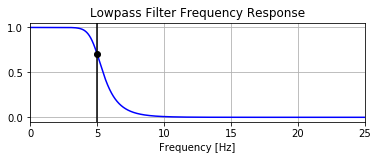

In [48]:
#Run the aliased data through a post processing butterworth filter, save results as post processed data - pp
'''
head_pp_df
neck_pp_df
shoulder_pp_df
heart_pp_df
com_pp_df
'''

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #The Nyquist frequency is half the sampling rate.
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 50.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

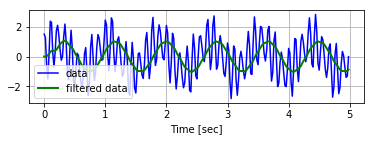

In [49]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [50]:
# The data to be filtered is as follows:
cols_to_filter = ['Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz'] 

# Filter the data, and plot both the original and filtered signals.
for cols in cols_to_filter:
    head_raw_temp_df[cols] = butter_lowpass_filter(head_raw_temp_df[cols], cutoff, fs, order)
    neck_raw_temp_df[cols] = butter_lowpass_filter(neck_raw_temp_df[cols], cutoff, fs, order)
    shoulder_raw_temp_df[cols] = butter_lowpass_filter(shoulder_raw_temp_df[cols], cutoff, fs, order)
    heart_raw_temp_df[cols] = butter_lowpass_filter(heart_raw_temp_df[cols], cutoff, fs, order)
    com_raw_temp_df[cols] = butter_lowpass_filter(com_raw_temp_df[cols], cutoff, fs, order)

In [51]:
#Save dataframe into new .csv
head_raw_temp_df.to_csv(bmfp_v4_head + 'BUTTERWORTH_FLTR_HEAD_DATA.csv')
head_butterflt_df = pd.read_csv(bmfp_v4_head + 'BUTTERWORTH_FLTR_HEAD_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

neck_raw_temp_df.to_csv(bmfp_v4_neck + 'BUTTERWORTH_FLTR_NECK_DATA.csv')
neck_butterflt_df = pd.read_csv(bmfp_v4_neck + 'BUTTERWORTH_FLTR_NECK_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

shoulder_raw_temp_df.to_csv(bmfp_v4_shoulder + 'BUTTERWORTH_FLTR_SHOULDER_DATA.csv')
shoulder_butterflt_df = pd.read_csv(bmfp_v4_shoulder + 'BUTTERWORTH_FLTR_SHOULDER_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

heart_raw_temp_df.to_csv(bmfp_v4_heart + 'BUTTERWORTH_FLTR_HEART_DATA.csv')
heart_butterflt_df = pd.read_csv(bmfp_v4_heart + 'BUTTERWORTH_FLTR_HEART_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

com_raw_temp_df.to_csv(bmfp_v4_com + 'BUTTERWORTH_FLTR_COM_DATA.csv')
com_butterflt_df = pd.read_csv(bmfp_v4_com + 'BUTTERWORTH_FLTR_COM_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#For debugging purposes - Checkpoint
#Print last dataframe to show code has completed
#com_butterflt_df

### Calculate Data

The Invensesense MPU-9250 reports accelerometer data using a 16-bit value, or 65536 counts. To convert the raw data to “g” units and “degree-seconds”, accelerometer data is divided by 2048 and gyroscope data is divided by 65.536. 

In [52]:
#Divide columns Ax, Ay, Az by 2048
#Divide Gx, Gy, Gz by 65.536
acceleration_cols = ['Ax', 'Ay', 'Az']
gyroscope_cols = ['Gx', 'Gy', 'Gz']
count_g = 2048
degree_sec = 65.536
is_int = np.int64 
if_float = np.float64


for a_cols in acceleration_cols:
    
    if (head_butterflt_df[a_cols].dtype == np.float64 
        and neck_butterflt_df[a_cols].dtype == np.float64 
        and shoulder_butterflt_df[a_cols].dtype == np.float64 
        and heart_butterflt_df[a_cols].dtype == np.float64
        and com_butterflt_df[a_cols].dtype == np.float64):
        
        head_butterflt_df[a_cols] = head_butterflt_df[a_cols].divide(count_g)
        neck_butterflt_df[a_cols] = neck_butterflt_df[a_cols].divide(count_g)
        shoulder_butterflt_df[a_cols] = shoulder_butterflt_df[a_cols].divide(count_g)
        heart_butterflt_df[a_cols] = heart_butterflt_df[a_cols].divide(count_g)
        com_butterflt_df[a_cols] = com_butterflt_df[a_cols].divide(count_g)   

for g_cols in gyroscope_cols:
    if (head_butterflt_df[g_cols].dtype == np.float64 
        and neck_butterflt_df[g_cols].dtype == np.float64 
        and shoulder_butterflt_df[g_cols].dtype == np.float64 
        and heart_butterflt_df[g_cols].dtype == np.float64
        and com_butterflt_df[g_cols].dtype == np.float64):
        
        head_butterflt_df[g_cols] = head_butterflt_df[g_cols].divide(degree_sec)
        neck_butterflt_df[g_cols] = neck_butterflt_df[g_cols].divide(degree_sec)
        shoulder_butterflt_df[g_cols] = shoulder_butterflt_df[g_cols].divide(degree_sec)
        heart_butterflt_df[g_cols] = heart_butterflt_df[g_cols].divide(degree_sec)
        com_butterflt_df[g_cols] = com_butterflt_df[g_cols].divide(degree_sec)

In [53]:
#Save dataframe into new .csv
head_butterflt_df.to_csv(bmfp_v4_head + 'MANIPULATED_HEAD_DATA.csv')
head_mnptd_df = pd.read_csv(bmfp_v4_head + 'MANIPULATED_HEAD_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

neck_butterflt_df.to_csv(bmfp_v4_neck + 'MANIPULATED_NECK_DATA.csv')
neck_mnptd_df = pd.read_csv(bmfp_v4_neck + 'MANIPULATED_NECK_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

shoulder_butterflt_df.to_csv(bmfp_v4_shoulder + 'MANIPULATED_SHOULDER_DATA.csv')
shoulder_mnptd_df = pd.read_csv(bmfp_v4_shoulder + 'MANIPULATED_SHOULDER_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

heart_butterflt_df.to_csv(bmfp_v4_heart + 'MANIPULATED_HEART_DATA.csv')
heart_mnptd_df = pd.read_csv(bmfp_v4_heart + 'MANIPULATED_HEART_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

com_butterflt_df.to_csv(bmfp_v4_com + 'MANIPULATED_COM_DATA.csv')
com_mnptd_df = pd.read_csv(bmfp_v4_com + 'MANIPULATED_COM_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#For debugging purposes - Checkpoint
#Print last dataframe to show code has completed
#com_mnptd_df

#### This part will be added through Tableau Data Visualization

### Plot Data
1. Acceleration
2. G-Force
3. Quaternion

### Data Analysis

#### Acceleration & Gyroscope
1. MAX vs MIN experienced
2. Dependent on the MAX and MIN recorded, what was the longest duration of that acceleration experienced?

#### Quarternion
1. What was the position of the test participant? This will should be mapped to the acceleration experienced.

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



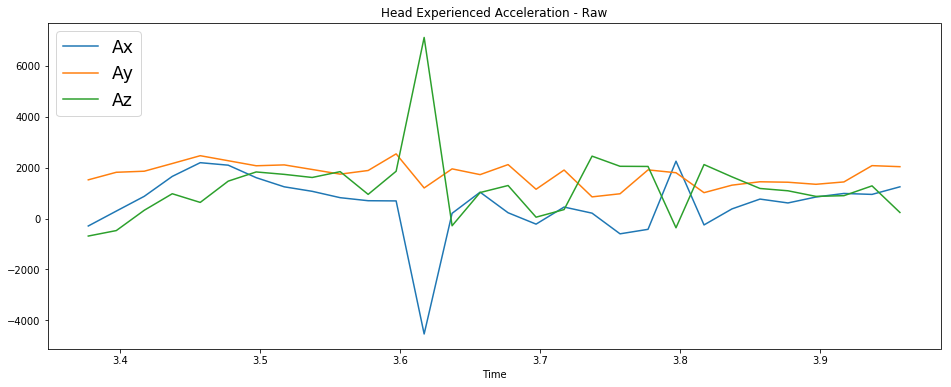

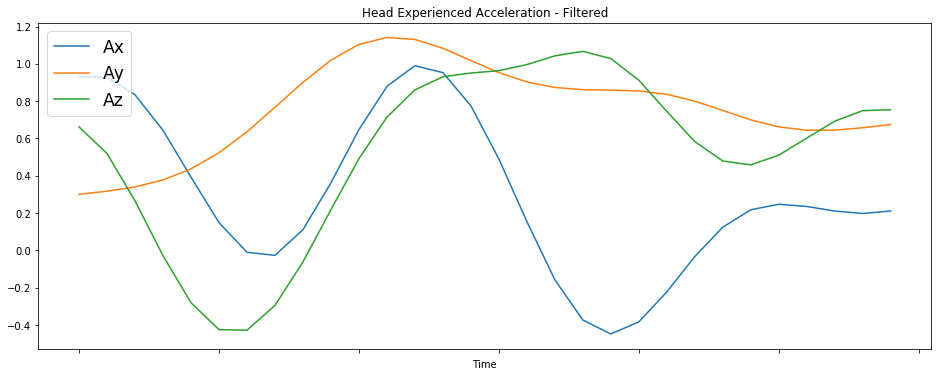

In [56]:
'''
1. Plot HEAD data
'''


# Raw Data
head_raw_plot = head_results.iloc[170:200].plot(title = 'Head Experienced Acceleration - Raw',  
                                   x = 'Time', y = acceleration_cols,
                                   figsize = (16,6))
head_raw_plot.legend(loc=2, fontsize = 'xx-large')


#Filtered Data
head_pp_plot = head_mnptd_df.iloc[170:200].plot(title = 'Head Experienced Acceleration - Filtered',  
                                   x = 'Time', y = acceleration_cols,
                                   figsize = (16,6))
head_pp_plot.legend(loc=2, fontsize = 'xx-large')
